In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
image_path = 'data/image.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [4]:
lower_cream = np.array([15, 30, 160])  
upper_cream = np.array([35, 100, 255])

In [5]:
court_mask = cv2.inRange(hsv_image, lower_cream, upper_cream)
contours, _ = cv2.findContours(court_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
cropped_court = None

In [7]:
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    cropped_court = image_rgb[y:y+h, x:x+w]

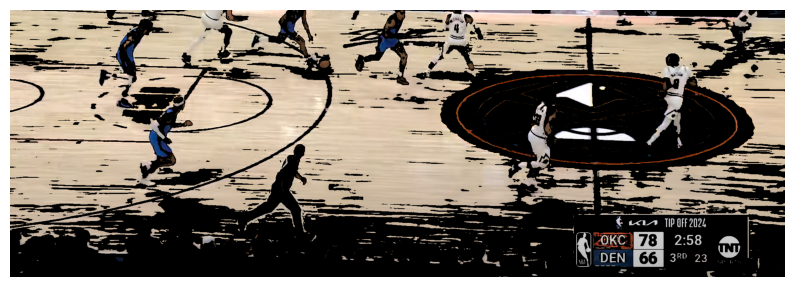

Court Dominance: 0.17


In [8]:
if cropped_court is not None:
    image_enhanced = cv2.convertScaleAbs(cropped_court, alpha=1.2, beta=30)
    hsv_court = cv2.cvtColor(image_enhanced, cv2.COLOR_RGB2HSV)

    lower_blue = np.array([90, 100, 50])
    upper_blue = np.array([130, 255, 255])
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([180, 40, 255])
    lower_ball = np.array([5, 100, 100])    
    upper_ball = np.array([15, 255, 255])

    blue_mask = cv2.inRange(hsv_court, lower_blue, upper_blue)
    white_mask = cv2.inRange(hsv_court, lower_white, upper_white)
    ball_mask = cv2.inRange(hsv_court, lower_ball, upper_ball)

    combined_mask = cv2.bitwise_or(blue_mask, white_mask)
    final_mask = cv2.bitwise_or(combined_mask, ball_mask)

    highlighted_objects = cv2.bitwise_and(cropped_court, cropped_court, mask=final_mask)

    plt.figure(figsize=(10, 6))
    plt.imshow(highlighted_objects)
    plt.axis('off')
    plt.show()

    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    player_x_positions = []

    for contour in contours:
        if cv2.contourArea(contour) > 100:  
            x, y, w, h = cv2.boundingRect(contour)
            player_x = x + w / 2
            player_x_positions.append(player_x)

    ball_position = None
    contours, _ = cv2.findContours(ball_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 20:  
            x, y, w, h = cv2.boundingRect(contour)
            ball_position = x + w / 2 
            break 

    if ball_position is not None:
        player_x_positions.append(ball_position)

    if player_x_positions:
        average_x_position = np.mean(player_x_positions)

        court_width = cropped_court.shape[1]
        court_dominance = (2 * average_x_position / court_width) - 1

        print(f"Court Dominance: {court_dominance:.2f}")
    else:
        print("No players or ball detected.")
else:
    print("Court area not detected. Adjust the HSV range.")